In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Get rid of scientific notation (e) while displaying numbers in a data frame
pd.options.display.float_format = '{:.2f}'.format

# Set plot style and palette
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Read in the Ecommerce Customers csv file as a DataFrame called customers.
dataset = pd.read_csv('Mall_Customers.csv')

# Check the first 5 rows
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Describe the data
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [3]:
# Show info about customers
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# EDA

In [4]:
# Create a new column for dataset called 'Gender', which is a 1 for a Male, and a 0 for a Female.
def converter(gender):
    if gender == 'Male':
        return 1
    else:
        return 0

# Apply converter function to the private column
dataset['Gender'] = dataset['Genre'].apply(converter)

# Show the head of dataset
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


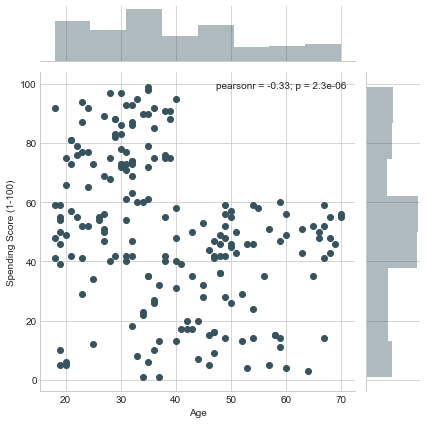

In [5]:
# Use seaborn to create a jointplot to compare the Annual Income (k$) and Spending Score (1-100) columns.
sns.jointplot(x='Age',y='Spending Score (1-100)',data=dataset)
plt.show()

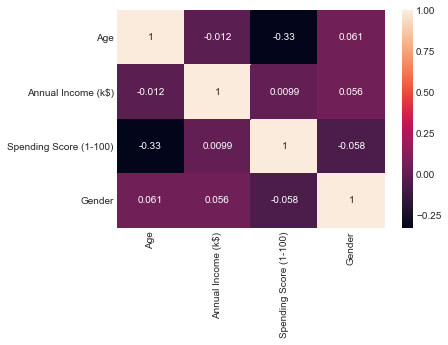

In [6]:
# Create the heatmap of the correlations
sns.heatmap(dataset.drop('CustomerID', axis = 1).corr(), annot = True)

# Model Creation

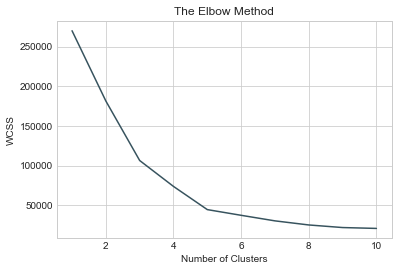

In [7]:
# Create independent variables
X = dataset.iloc[:, [3,4]].values

# Import KMeans
from sklearn.cluster import KMeans

# Create the wcss list that contains within-cluster sum of squares of each loop
wcss = []

# Create a loop in order to find optimal cluster amount
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualize the values in wcss list
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Create an instance of a KMeans() model named kmeans
kmeans =KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [9]:
# Show the clusters
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

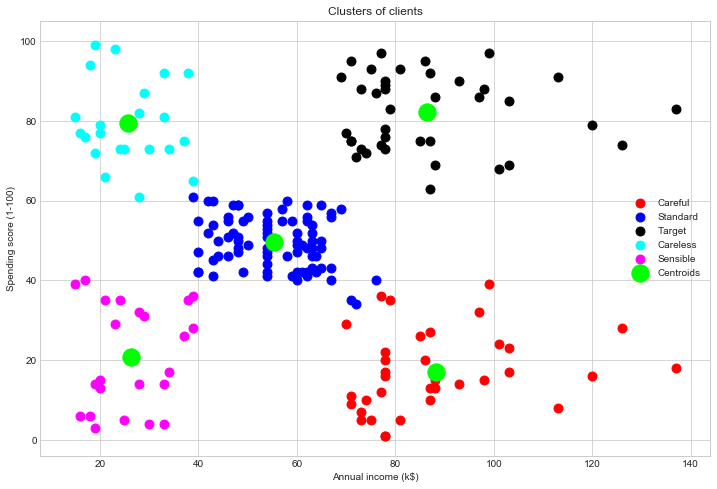

In [11]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80,
           c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80,
           c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80,
           c = 'black', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 80,
           c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 80,
           c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,
           c = 'lime', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()